In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

plt.style.use("seaborn-poster")
%matplotlib inline

sys.path.append("../")

import settings

In [10]:
FILE_PATH = settings.getSet().DEFAULT_TRAIN_FILE_B
v = np.load("../{}".format(FILE_PATH))

In [11]:
np.random.shuffle(v)
a = v[:]
v = v[:,1]
v = np.array([i["turn_rate"] for i in v])

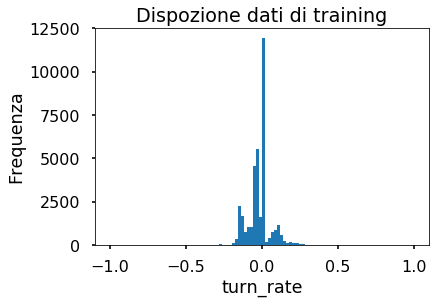

In [4]:
plt.hist(v, bins=100, range=[-1,1])
plt.xlabel("turn_rate")
plt.ylabel("Frequenza")
plt.title("Dispozione dati di training")
plt.show()

In [17]:
left, right, forward = [], [], []

for item in a:
    if  -1.0 < item[1]["turn_rate"] < -0.1:
        left.append(item)
    elif 0.1 < item[1]["turn_rate"] < 1.0:
        right.append(item)
    else:
        forward.append(item)
        
lenmax = len(forward)
while len(left) < lenmax:
    left.append(random.choice(left))
    
while len(right) < lenmax:
    right.append(random.choice(right))
    
a = np.array(left+forward+right)

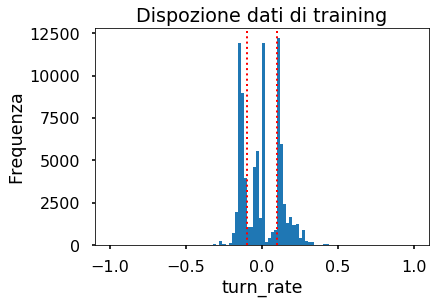

In [6]:
a = np.array(left+forward+right)[:,1]
a = np.array([i["turn_rate"] for i in a])
plt.hist(a, bins=100, range=[-1,1])
plt.xlabel("turn_rate")
plt.ylabel("Frequenza")
plt.title("Dispozione dati di training")
plt.axvline(x=0.1, color="red", linewidth=2, linestyle="dotted")
plt.axvline(x=-0.1, color="red", linewidth=2, linestyle="dotted")
plt.show()

In [18]:
np.random.shuffle(a)
np.save("balanced_debug.npy", a)

In [20]:
v.shape

(35989,)